In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv("california_housing_train.csv")
test = pd.read_csv("california_housing_test.csv")

In [19]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [20]:
test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [21]:
y_train = np.array(df["median_house_value"])
arr = np.array(df.drop('median_house_value' , axis =1)).T
for i in range(len(arr)):
  arr[i] = (arr[i] - np.mean(arr[i]))/np.std(arr[i] , axis =0)
x_train = arr.T

In [22]:
def loss(pred, y_test):
  mse = np.mean((pred-y_test)**2)
  return mse

In [23]:
def y_prediction(x,a,b):
  y_pred = np.dot(x,a) +b
  assert y_pred.shape == (x.shape[0] ,)
  return y_pred

In [24]:
def gradient(x,a,b,y_true):
  m,n  =x.shape
  y_pred = y_prediction(x,a,b)
  error = y_pred - y_true
  derivative_a = (2/m) * np.dot(x.T , error)
  derivative_b = (2/m) * np.sum(error)
  assert(derivative_a.shape == (n,))
  return (derivative_a , derivative_b)

In [25]:
def gradient_descent(x,y_true,learning_rate=0.01,epochs=10):
  m,n = x.shape
  loss_mse = []
  a = np.random.normal(0,0.5,size = (n,)) * np.sqrt(2/n)
  b =0
  for i in range(epochs):
    da , db = gradient(x,a,b,y_true)
    a = a - learning_rate*da
    b = b - learning_rate*db
    y_pred = y_prediction(x,a,b)

    l_mse = loss(y_pred , y_true)
    loss_mse.append(l_mse)

    print("Epoch ",i+1," Completed!" , " loss = ",l_mse)

  print("Training completed!")

  assert(a.shape==(n,))
  return (loss_mse , a, b)

In [27]:
epochs = 200
learning_rate = 0.02
train_loss , a , b = gradient_descent(x_train , y_train , learning_rate , epochs)

Epoch  1  Completed!  loss =  52490440105.3678
Epoch  2  Completed!  loss =  48866239732.27297
Epoch  3  Completed!  loss =  45527296260.01891
Epoch  4  Completed!  loss =  42450623668.52802
Epoch  5  Completed!  loss =  39615213767.5346
Epoch  6  Completed!  loss =  37001831973.1167
Epoch  7  Completed!  loss =  34592843037.14603
Epoch  8  Completed!  loss =  32372060392.599026
Epoch  9  Completed!  loss =  30324614420.66178
Epoch  10  Completed!  loss =  28436836129.721775
Epoch  11  Completed!  loss =  26696153592.758343
Epoch  12  Completed!  loss =  25090999111.701126
Epoch  13  Completed!  loss =  23610725531.57072
Epoch  14  Completed!  loss =  22245530461.0896
Epoch  15  Completed!  loss =  20986387403.795513
Epoch  16  Completed!  loss =  19824982988.65821
Epoch  17  Completed!  loss =  18753659629.048477
Epoch  18  Completed!  loss =  17765363045.978546
Epoch  19  Completed!  loss =  16853594174.659853
Epoch  20  Completed!  loss =  16012365038.951109
Epoch  21  Completed!  l

Loss on test data =  5250668176.263181


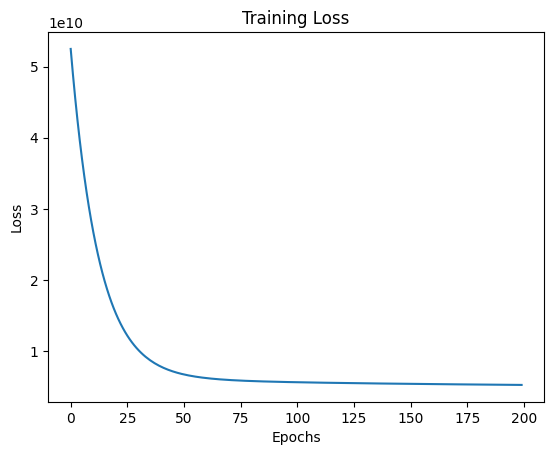

In [28]:
arr = np.array(test.drop('median_house_value' , axis=1)).T
for i in range(len(arr)):
  arr[i] = (arr[i] - np.mean(arr[i])) / np.std(arr[i],axis=0)
y_test = np.array(test['median_house_value'])
x_test = arr.T

test_loss = loss(y_prediction(x_test,a,b) , y_test)

print("Loss on test data = ",test_loss)


plt.plot([i for i in range(epochs)], train_loss)                   # plot loss versus epochs
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()